<a href="https://colab.research.google.com/github/bramha574/SDP/blob/main/sdp_overall_code_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [153]:
import pandas as pd
import numpy as np

#Reading the dataset
all_metrics = pd.read_csv("/content/drive/MyDrive/MLAnalysis/READYTOMLALLMETRICS.csv")
all_metrics = all_metrics.rename(columns={"BUG_STATUS_y": "BUG_STATUS"})

In [154]:
all_metrics

,Unnamed: 0,entity,Parent,McCC,CLOC,LLOC,LOC,age-months,n-authors,n-revs,BUG_STATUS
0,0,test/__init__.py,L114,1,0,0,1,NaN,NaN,NaN,0.0
1,1,test/helper.py,L114,55,12,233,282,NaN,NaN,NaN,0.0
2,2,test/test_InfoExtractor.py,L114,7,50,1045,1132,NaN,NaN,NaN,1.0
3,3,test/test_YoutubeDL.py,L114,14,39,792,994,NaN,NaN,NaN,1.0
4,4,test/test_YoutubeDLCookieJar.py,L114,1,4,36,51,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
38615,38615,pipenv/vendor/urllib3/packages/ssl_match_hostn...,L70825,1,7,14,22,5.0,2.0,5.0,1.0
38616,38616,pipenv/vendor/urllib3/packages/ssl_match_hostn...,L70825,29,53,103,160,16.0,1.0,4.0,1.0
38617,38617,pipenv/vendor/importlib_resources/tests/data01...,L49302,1,0,0,1,13.0,1.0,1.0,1.0
38618,38618,pipenv/vendor/importlib_resources/tests/data02...,L49312,1,0,0,1,13.0,1.0,1.0,1.0


In [157]:
all_metrics.isnull().sum()
all_metrics = all_metrics.fillna(all_metrics.median())


In [133]:
#Quick description of data
all_metrics.info()
all_metrics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38620 entries, 0 to 38619
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38620 non-null  int64  
 1   entity      38620 non-null  object 
 2   Parent      38620 non-null  object 
 3   McCC        38620 non-null  int64  
 4   CLOC        38620 non-null  int64  
 5   LLOC        38620 non-null  int64  
 6   LOC         38620 non-null  int64  
 7   age-months  30466 non-null  float64
 8   n-authors   30466 non-null  float64
 9   n-revs      30466 non-null  float64
 10  BUG_STATUS  38620 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 3.2+ MB


,Unnamed: 0,McCC,CLOC,LLOC,LOC,age-months,n-authors,n-revs,BUG_STATUS
count,38620.000000,38620.000000,38620.000000,38620.000000,38620.000000,30466.000000,30466.000000,30466.000000,38620.000000
mean,19309.500000,9.158182,5.313542,112.148369,180.508622,13.348421,4.028852,10.148198,0.433014
std,11148.778035,30.987308,49.860791,240.647537,391.612349,13.536503,3.392791,13.611047,0.495499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,9654.750000,1.000000,0.000000,20.000000,53.000000,2.000000,2.000000,3.000000,0.000000
50%,19309.500000,2.000000,0.000000,50.000000,93.000000,9.000000,3.000000,8.000000,0.000000
75%,28964.250000,7.000000,0.000000,114.000000,184.000000,22.000000,5.000000,13.000000,1.000000
max,38619.000000,866.000000,3195.000000,11089.000000,26422.000000,60.000000,126.000000,673.000000,1.000000


In [160]:
#Removing the un necessary columns
all_metrics.drop(['Unnamed: 0', 'Parent'], inplace=True, axis=1)

In [135]:

#import seaborn as sns
#sns.countplot(x='BUG_STATUS', data=all_metrics)

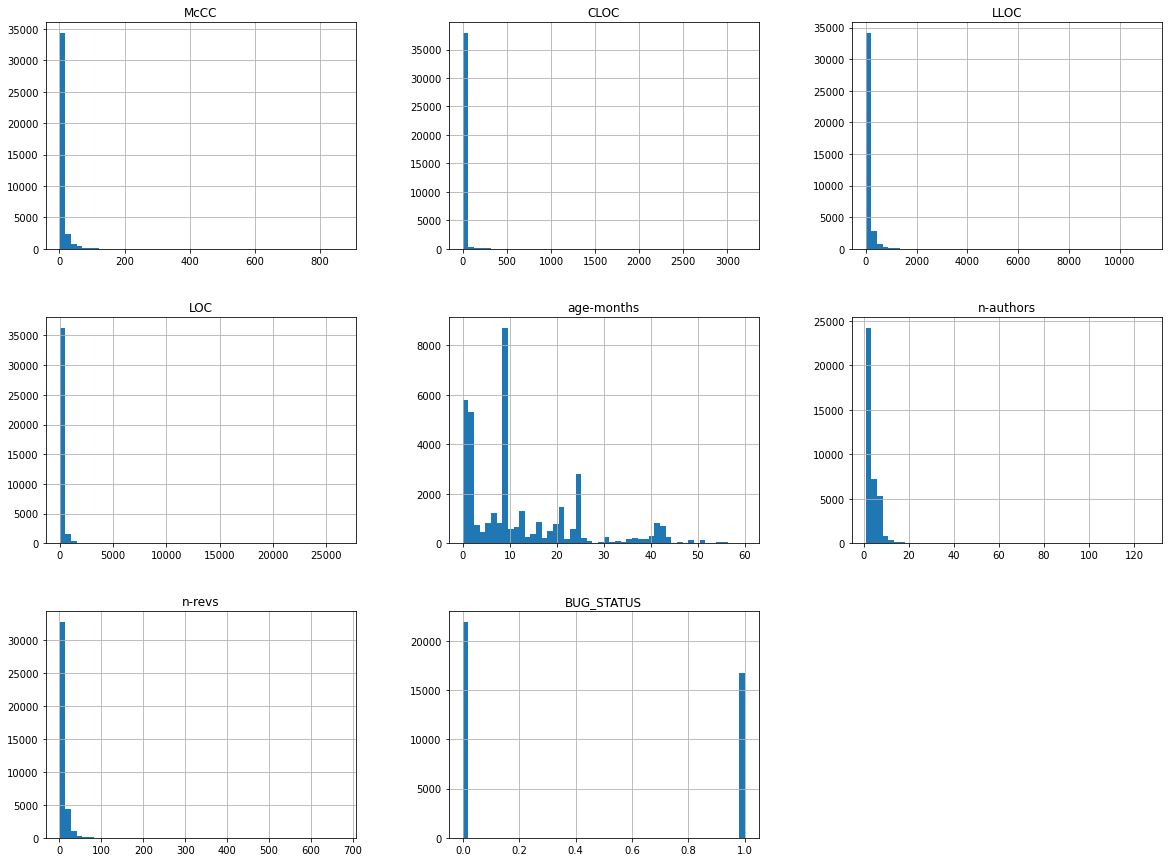

In [161]:
import matplotlib.pyplot as plt
all_metrics.hist(bins=50,figsize=(20,15))
plt.show()

In [162]:
# #train and test set splitting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(all_metrics,test_size=0.2,random_state=42)

In [163]:
x = len(train_set)
y = len(test_set)
print(train_set.shape)
print(test_set.shape)

(30896, 9)
(7724, 9)


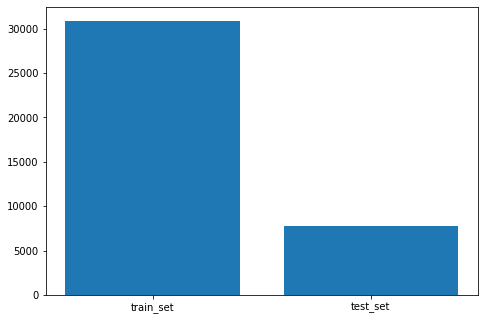

In [164]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
set_ = ['train_set','test_set']
length =  [x,y]
ax.bar(set_,length)
plt.show()

In [165]:
all_metrics = train_set.copy()

In [166]:
#checking correlation
corr_matrix = all_metrics.corr()
corr_matrix["BUG_STATUS"].sort_values(ascending=False)

BUG_STATUS    1.000000
LLOC          0.183161
LOC           0.159084
McCC          0.116698
CLOC          0.086818
n-revs        0.084677
n-authors     0.069318
age-months   -0.021640
Name: BUG_STATUS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60ae797710>,
      dtype=object)

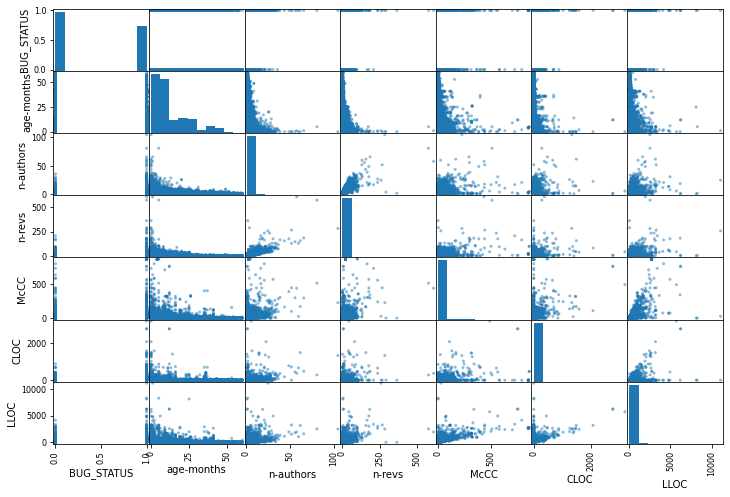

In [168]:


#checking correlation with scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["BUG_STATUS", "age-months", "n-authors","n-revs", "McCC", "CLOC", "LLOC"]
scatter_matrix(all_metrics[attributes],figsize=(12,8))

In [171]:
X_train = train_set.drop("BUG_STATUS",axis=1)
y_train = train_set['BUG_STATUS'].copy()

X_test = test_set.drop("BUG_STATUS",axis=1)
y_test = test_set['BUG_STATUS'].copy()

In [172]:
X_train = X_train.drop("entity",axis=1)
X_test = X_test.drop("entity",axis=1)

In [173]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [175]:
X_train

array([[-0.26415397, -0.10238295, -0.35237601, ...,  0.62162407,
        -0.9530412 , -0.74919566],
       [-0.0713605 , -0.10238295,  1.11735624, ..., -0.28234361,
        -0.27439363, -0.14548673],
       [-0.23202173, -0.10238295, -0.0275733 , ..., -1.02195352,
         2.10087288,  1.06193114],
       ...,
       [-0.26415397, -0.08331372, -0.27523537, ...,  0.04637191,
        -0.9530412 , -0.74919566],
       [-0.23202173, -0.10238295, -0.32395577, ...,  0.04637191,
         0.74357773, -0.14548673],
       [ 0.2820942 , -0.10238295,  0.25662907, ..., -0.11798585,
         0.40425395,  1.06193114]])

In [176]:
y_train

31693    0.0
7831     1.0
29891    1.0
34714    0.0
11034    0.0
        ... 
6265     0.0
11284    0.0
38158    1.0
860      1.0
15795    1.0
Name: BUG_STATUS, Length: 30896, dtype: float64

In [177]:
X_test

array([[-0.0713605 , -0.10238295,  0.04956734, ..., -1.02195352,
        -0.27439363, -0.23173086],
       [-0.13562499, -0.10238295,  0.05362738, ..., -0.28234361,
        -0.27439363, -0.14548673],
       [-0.19988948, -0.10238295, -0.3036556 , ..., -0.28234361,
        -0.27439363, -0.14548673],
       ...,
       [-0.26415397, -0.10238295, -0.36861615, ..., -0.93977464,
        -0.61371741, -0.66295153],
       [-0.26415397, -0.10238295, -0.38079625, ..., -0.03580697,
        -0.9530412 , -0.74919566],
       [-0.26415397, -0.10238295, -0.44169675, ...,  2.42955941,
        -0.9530412 , -0.66295153]])

In [178]:
y_test

29074    1.0
2323     0.0
8879     0.0
5503     1.0
33846    0.0
        ... 
13088    0.0
21237    0.0
17559    1.0
16235    1.0
34870    0.0
Name: BUG_STATUS, Length: 7724, dtype: float64

In [179]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# Classifiers:
# Logistic Regression
# Decision Tree
# Support Vector Machine

# Linear Discriminant Analysis
# Quadratic Discriminant Analysis
# Random Forest
# K-Nearest Neighbors
# Naive Bayes

# Scoring:
# precision score
# recall score
# F1 score
# support score
# accuracy score
# AUC/ROC

Cross validation Accuracy:
Accuracy: 0.754 (0.006)
GRID SEARCH FOR DECISION TREE CLASSIFIER
Best Parameters
{'random_state': 36}
Best estimaters
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=36, splitter='best')
CONFUSION MATRIX
[[3430  927]
 [ 968 2399]]
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      4357
         1.0       0.72      0.71      0.72      3367

    accuracy                           0.75      7724
   macro avg       0.75      0.75      0.75      7724
weighted avg       0.75      0.75      0.75      7724

Accuracy: 0.7546607975142413
Precision: 0.7212868310282622


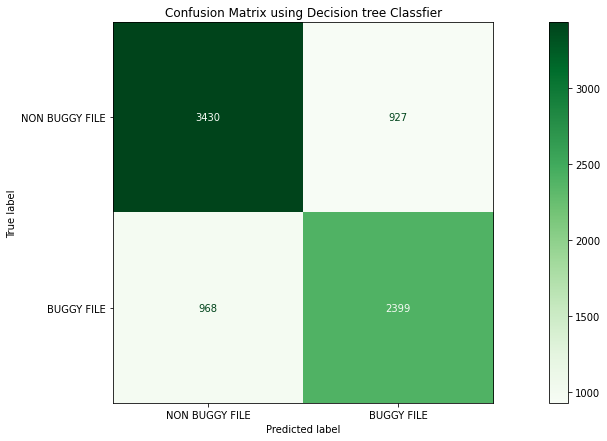

In [180]:
# Decision Tree
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# create model
model = DecisionTreeClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR DECISION TREE CLASSIFIER")

params = { 
    "random_state":range(30,40)} 
gs_Deci = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_Deci.fit(X_train, y_train)

print("Best Parameters")
print(gs_Deci.best_params_)

print("Best estimaters")
print(gs_Deci.best_estimator_)

#Predicting Bugs
y_pred = gs_Deci.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

RF_confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


RF_confusion.ax_.set_title("Confusion Matrix using Decision tree Classfier")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.628 (0.005)
CONFUSION MATRIX
[[4056  301]
 [2523  844]]
              precision    recall  f1-score   support

         0.0       0.62      0.93      0.74      4357
         1.0       0.74      0.25      0.37      3367

    accuracy                           0.63      7724
   macro avg       0.68      0.59      0.56      7724
weighted avg       0.67      0.63      0.58      7724

Accuracy: 0.6343863283272916
Precision: 0.737117903930131
Recall: 0.25066825066825066
F1 Score: 0.3741134751773049
Mean Absolute Error: 0.3656136716727084
Cohens kappa: 0.1963018185015043
ROC AUC: 0.5907920091991701


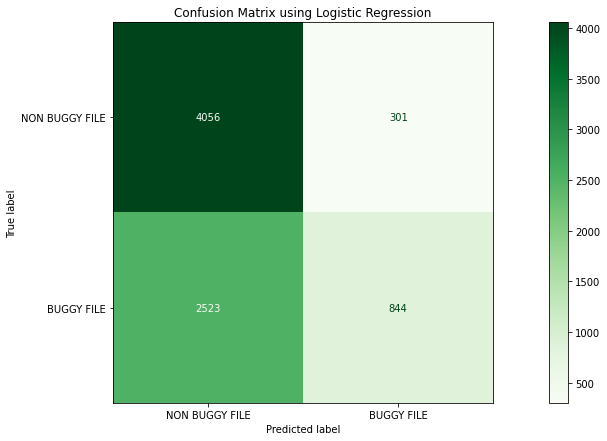

In [181]:
# Logistic regression
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = LogisticRegression()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")

model.fit(X_train, y_train)



#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Logistic Regression")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.718 (0.009)
CONFUSION MATRIX
[[3843  514]
 [1662 1705]]
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78      4357
         1.0       0.77      0.51      0.61      3367

    accuracy                           0.72      7724
   macro avg       0.73      0.69      0.69      7724
weighted avg       0.73      0.72      0.71      7724

Accuracy: 0.7182806835836354
Precision: 0.7683641279855791
Recall: 0.5063855063855064
F1 Score: 0.6104547081990691
Mean Absolute Error: 0.28171931641636455
Cohens kappa: 0.4040664005107448
ROC AUC: 0.6942072126832282


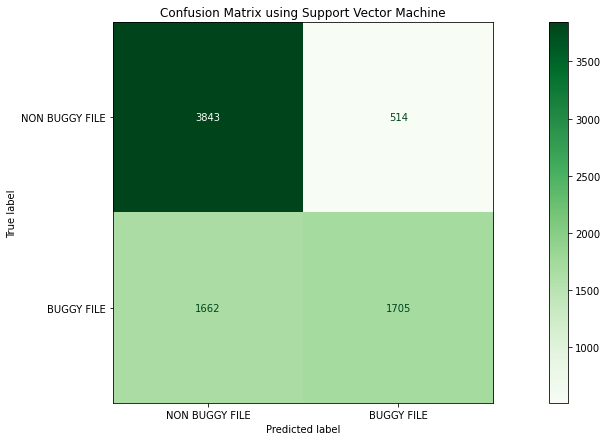

In [199]:
# Support Vector Machine
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = SVC(gamma='auto')

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
# print("GRID SEARCH FOR SVM")

# params = { 
#     "random_state":range(30,40)} 
# gs_svm = GridSearchCV(model,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=10)
model.fit(X_train, y_train)

# print("Best Parameters")
# print(gs_svm.best_params_)

# print("Best estimaters")
# print(gs_svm.best_estimator_)

#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Support Vector Machine")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.791 (0.006)
GRID SEARCH FOR Random Forest
Best Parameters
{'random_state': 32}
Best estimaters
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)
CONFUSION MATRIX
[[3642  715]
 [ 888 2479]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      4357
         1.0       0.78      0.74      0.76      3367

    accuracy                           0.79      7724
   macro avg       0.79      0.79      0.79      7724
weigh

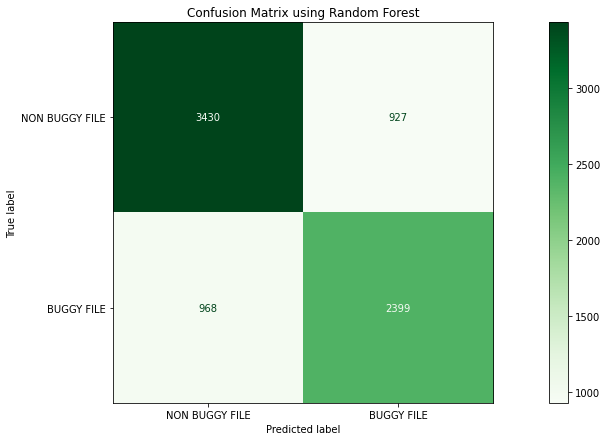

In [184]:
#Random Forest
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = RandomForestClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Random Forest")

params = { 
    "random_state":range(30,40)} 
gs_logi = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_logi.fit(X_train, y_train)

print("Best Parameters")
print(gs_logi.best_params_)

print("Best estimaters")
print(gs_logi.best_estimator_)

#Predicting Bugs
y_pred = gs_logi.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Random Forest")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.615 (0.004)
CONFUSION MATRIX
[[4214  143]
 [2808  559]]
              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74      4357
         1.0       0.80      0.17      0.27      3367

    accuracy                           0.62      7724
   macro avg       0.70      0.57      0.51      7724
weighted avg       0.69      0.62      0.54      7724

Accuracy: 0.6179440704298291
Precision: 0.7962962962962963
Recall: 0.16602316602316602
F1 Score: 0.2747603833865815
Mean Absolute Error: 0.38205592957017087
Cohens kappa: 0.14636393025040217
ROC AUC: 0.5666012089009564


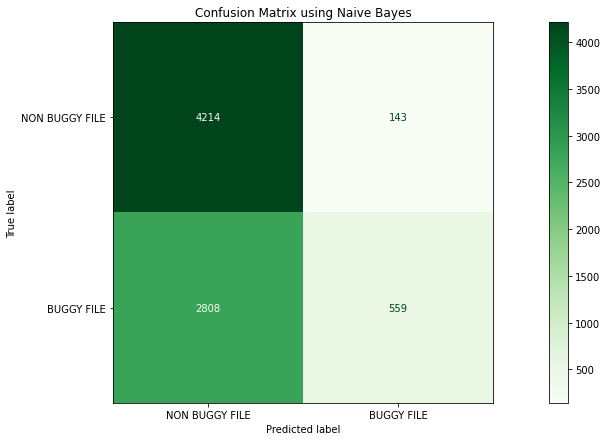

In [187]:
#Naive Bayes
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = GaussianNB()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================

model.fit(X_train, y_train)

#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Naive Bayes")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.758 (0.006)
CONFUSION MATRIX
[[3702  655]
 [1156 2211]]
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80      4357
         1.0       0.77      0.66      0.71      3367

    accuracy                           0.77      7724
   macro avg       0.77      0.75      0.76      7724
weighted avg       0.77      0.77      0.76      7724

Accuracy: 0.7655359917141378
Precision: 0.7714584787159805
Recall: 0.6566676566676567
F1 Score: 0.7094497031926842
Mean Absolute Error: 0.23446400828586225
Cohens kappa: 0.5150415780753104
ROC AUC: 0.7531674294355039


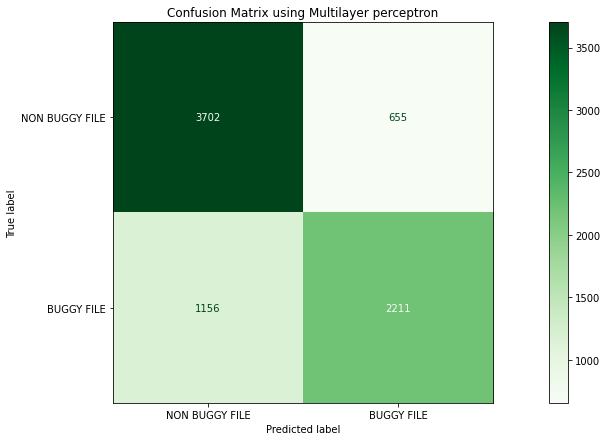

In [188]:
# Multilayer perceptron
from numpy import mean
from numpy import std
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = MLPClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")

model.fit(X_train, y_train)


#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Multilayer perceptron")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.763 (0.009)
CONFUSION MATRIX
[[3651  706]
 [1071 2296]]
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80      4357
         1.0       0.76      0.68      0.72      3367

    accuracy                           0.77      7724
   macro avg       0.77      0.76      0.76      7724
weighted avg       0.77      0.77      0.77      7724

Accuracy: 0.7699378560331435
Precision: 0.7648234510326449
Recall: 0.681912681912682
F1 Score: 0.7209923064845346
Mean Absolute Error: 0.23006214396685656
Cohens kappa: 0.5263571628915706
ROC AUC: 0.7599372911514294


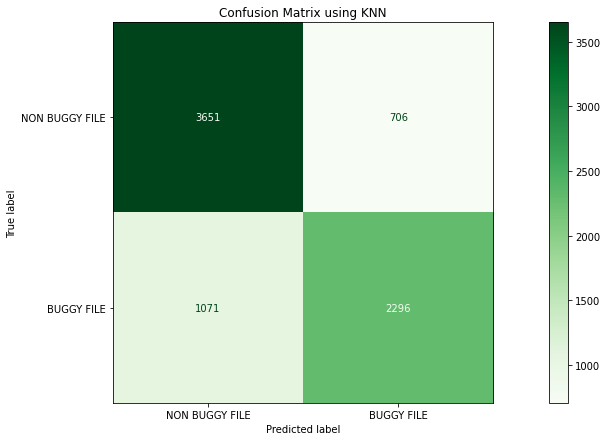

In [198]:
#KNN
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics


k = 15

# create model
model = KNeighborsClassifier(n_neighbors = k)

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================

model.fit(X_train, y_train)

#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using KNN")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")


Cross validation Accuracy:
Accuracy: 0.717 (0.009)
GRID SEARCH FOR AdaBoost
Best Parameters
{'random_state': 30}
Best estimaters
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=30)
CONFUSION MATRIX
[[3444  913]
 [1302 2065]]
              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76      4357
         1.0       0.69      0.61      0.65      3367

    accuracy                           0.71      7724
   macro avg       0.71      0.70      0.70      7724
weighted avg       0.71      0.71      0.71      7724

Accuracy: 0.7132314862765406
Precision: 0.69341840161182
Recall: 0.6133056133056133
F1 Score: 0.6509062253743105
Mean Absolute Error: 0.28676851372345935
Cohens kappa: 0.4091278693561248
ROC AUC: 0.7018788796388062


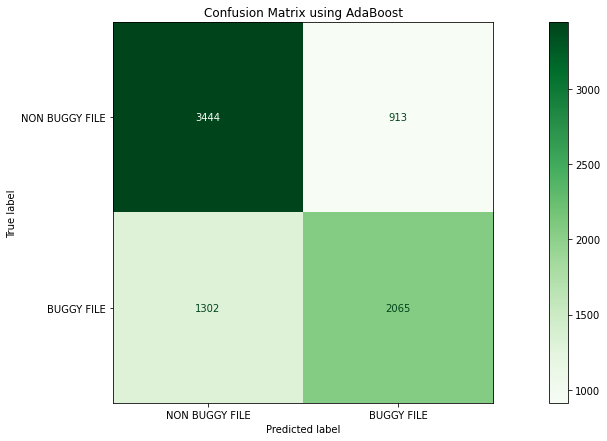

In [189]:
#AdaBoost
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = AdaBoostClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR AdaBoost")

params = { 
    "random_state":range(30,40)} 
gs_ada = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_ada.fit(X_train, y_train)

print("Best Parameters")
print(gs_ada.best_params_)

print("Best estimaters")
print(gs_ada.best_estimator_)

#Predicting Bugs
y_pred = gs_ada.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_ada.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using AdaBoost")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.622 (0.003)
CONFUSION MATRIX
[[4205  152]
 [2750  617]]
              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74      4357
         1.0       0.80      0.18      0.30      3367

    accuracy                           0.62      7724
   macro avg       0.70      0.57      0.52      7724
weighted avg       0.69      0.62      0.55      7724

Accuracy: 0.624287933713102
Precision: 0.8023407022106632
Recall: 0.18324918324918324
F1 Score: 0.2983558994197292
Mean Absolute Error: 0.37571206628689796
Cohens kappa: 0.1626183156332307
ROC AUC: 0.5741813967657438


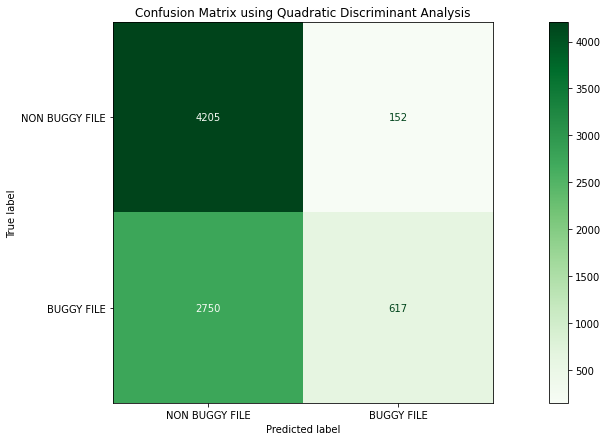

In [190]:
#Quadratic Discriminant Analysis
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = QuadraticDiscriminantAnalysis()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")


model.fit(X_train, y_train)
#====================================================================================================
print(50*"=")


#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Quadratic Discriminant Analysis")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.610 (0.004)
CONFUSION MATRIX
[[4229  128]
 [2865  502]]
              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74      4357
         1.0       0.80      0.15      0.25      3367

    accuracy                           0.61      7724
   macro avg       0.70      0.56      0.49      7724
weighted avg       0.68      0.61      0.53      7724

Accuracy: 0.6125064733298808
Precision: 0.7968253968253968
Recall: 0.1490941490941491
F1 Score: 0.2511883912934701
Mean Absolute Error: 0.3874935266701191
Cohens kappa: 0.13189719061007255
ROC AUC: 0.5598580683501501


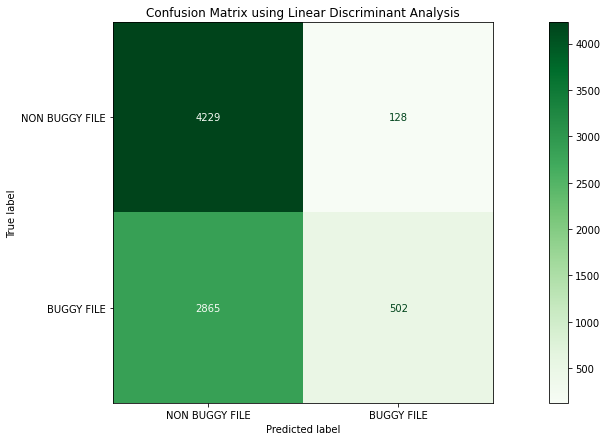

In [191]:
#LinearDiscriminantAnalysis
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = LinearDiscriminantAnalysis()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")


model.fit(X_train, y_train)
#====================================================================================================
print(50*"=")


#Predicting Bugs
y_pred = model.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(model,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Linear Discriminant Analysis")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")